In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, chain
%matplotlib inline 

## Считывание датасета и базовые статистики

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.zip", compression="zip")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Гистограммы/распределения признаков по целевой переменной

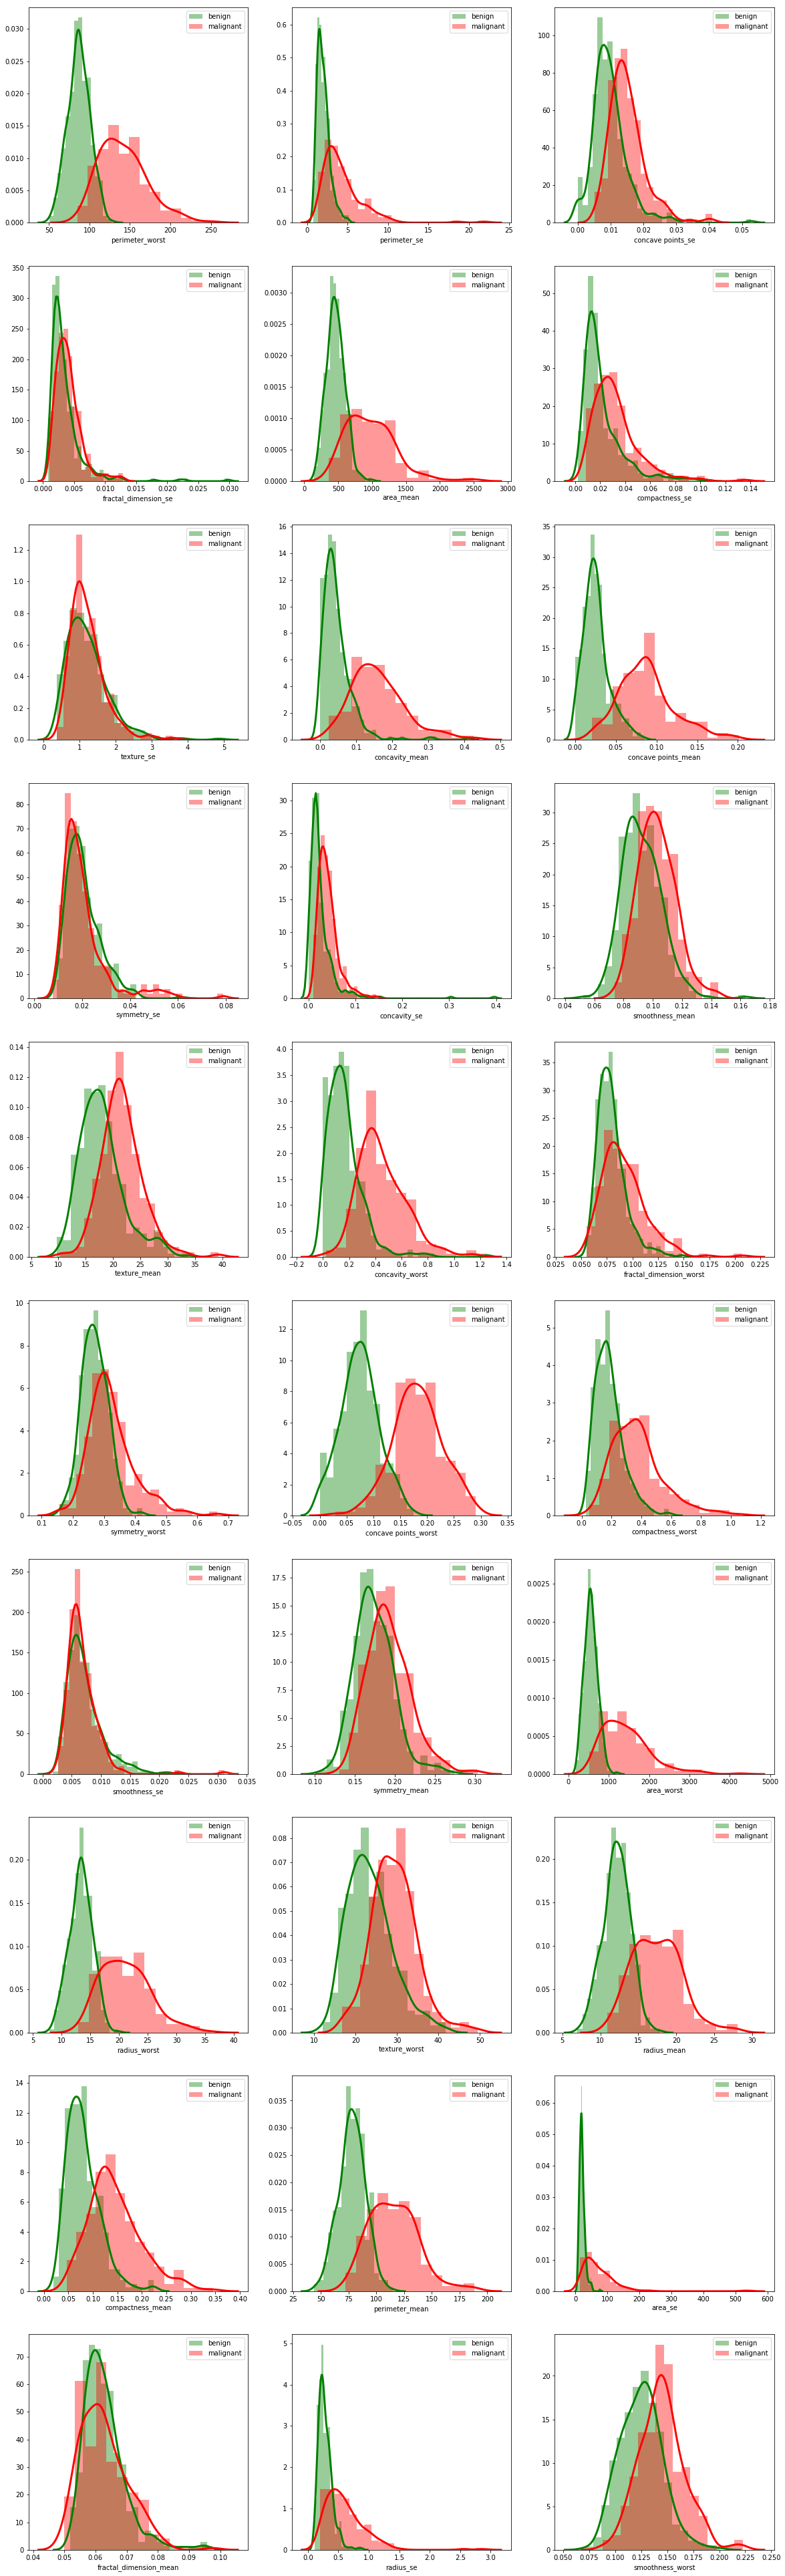

In [9]:
v = set(df.columns) - set(["id", "Unnamed: 32", "diagnosis"])
fig, axs = plt.subplots(10, 3, figsize=(20, 70))
j = 0
for i in v:
    ax = axs[j//3,j%3]
    ax = sns.distplot(df.loc[df['diagnosis'] == 'B', i], color="g", label="benign", ax=ax, kde_kws={'linewidth':3})
    ax = sns.distplot(df.loc[df['diagnosis'] == 'M', i], color="r", label="malignant", ax=ax, kde_kws={'linewidth':3})
    ax.legend()
    j += 1

## Heatmap для матрицы корреляций

In [10]:
# Подсчет корреляции между колонками
Corr = df[v].corr()
Corr

,perimeter_worst,perimeter_se,concave points_se,fractal_dimension_se,area_mean,compactness_se,texture_se,concavity_mean,concave points_mean,symmetry_se,...,area_worst,radius_worst,texture_worst,radius_mean,compactness_mean,perimeter_mean,area_se,fractal_dimension_mean,radius_se,smoothness_worst
perimeter_worst,1.000000,0.721031,0.394999,-0.001000,0.959120,0.260516,-0.102242,0.729565,0.855923,-0.103753,...,0.977578,0.993708,0.365098,0.965137,0.590210,0.970387,0.761213,-0.205151,0.719684,0.236775
perimeter_se,0.721031,1.000000,0.556264,0.244143,0.726628,0.416322,0.223171,0.660391,0.710650,0.266487,...,0.730713,0.697201,0.200371,0.674172,0.548905,0.693135,0.937655,0.039830,0.972794,0.130054
concave points_se,0.394999,0.556264,1.000000,0.611044,0.372320,0.744083,0.230283,0.683260,0.615634,0.312780,...,0.342271,0.358127,0.086741,0.376169,0.642262,0.407217,0.415730,0.341198,0.513346,0.215351
fractal_dimension_se,-0.001000,0.244143,0.611044,1.000000,-0.019887,0.803269,0.279723,0.449301,0.257584,0.369078,...,-0.022736,-0.037488,-0.003195,-0.042641,0.507318,-0.005523,0.127071,0.688132,0.227754,0.170568
area_mean,0.959120,0.726628,0.372320,-0.019887,1.000000,0.212583,-0.066280,0.685983,0.823269,-0.072497,...,0.959213,0.962746,0.287489,0.987357,0.498502,0.986507,0.800086,-0.283110,0.732562,0.123523
compactness_se,0.260516,0.416322,0.744083,0.803269,0.212583,1.000000,0.231700,0.670279,0.490424,0.394713,...,0.199371,0.204607,0.143003,0.206000,0.738722,0.250744,0.284840,0.559837,0.356065,0.227394
texture_se,-0.102242,0.223171,0.230283,0.279723,-0.066280,0.231700,1.000000,0.076218,0.021480,0.411621,...,-0.083195,-0.111690,0.409003,-0.097317,0.046205,-0.086761,0.111567,0.164174,0.213247,-0.073658
concavity_mean,0.729565,0.660391,0.683260,0.449301,0.685983,0.670279,0.076218,1.000000,0.921391,0.178009,...,0.675987,0.688236,0.299879,0.676764,0.883121,0.716136,0.617427,0.336783,0.631925,0.448822
concave points_mean,0.855923,0.710650,0.615634,0.257584,0.823269,0.490424,0.021480,0.921391,1.000000,0.095351,...,0.809630,0.830318,0.292752,0.822529,0.831135,0.850977,0.690299,0.166917,0.698050,0.452753
symmetry_se,-0.103753,0.266487,0.312780,0.369078,-0.072497,0.394713,0.411621,0.178009,0.095351,1.000000,...,-0.110343,-0.128121,-0.077473,-0.104321,0.229977,-0.081629,0.134109,0.345007,0.240567,-0.012662


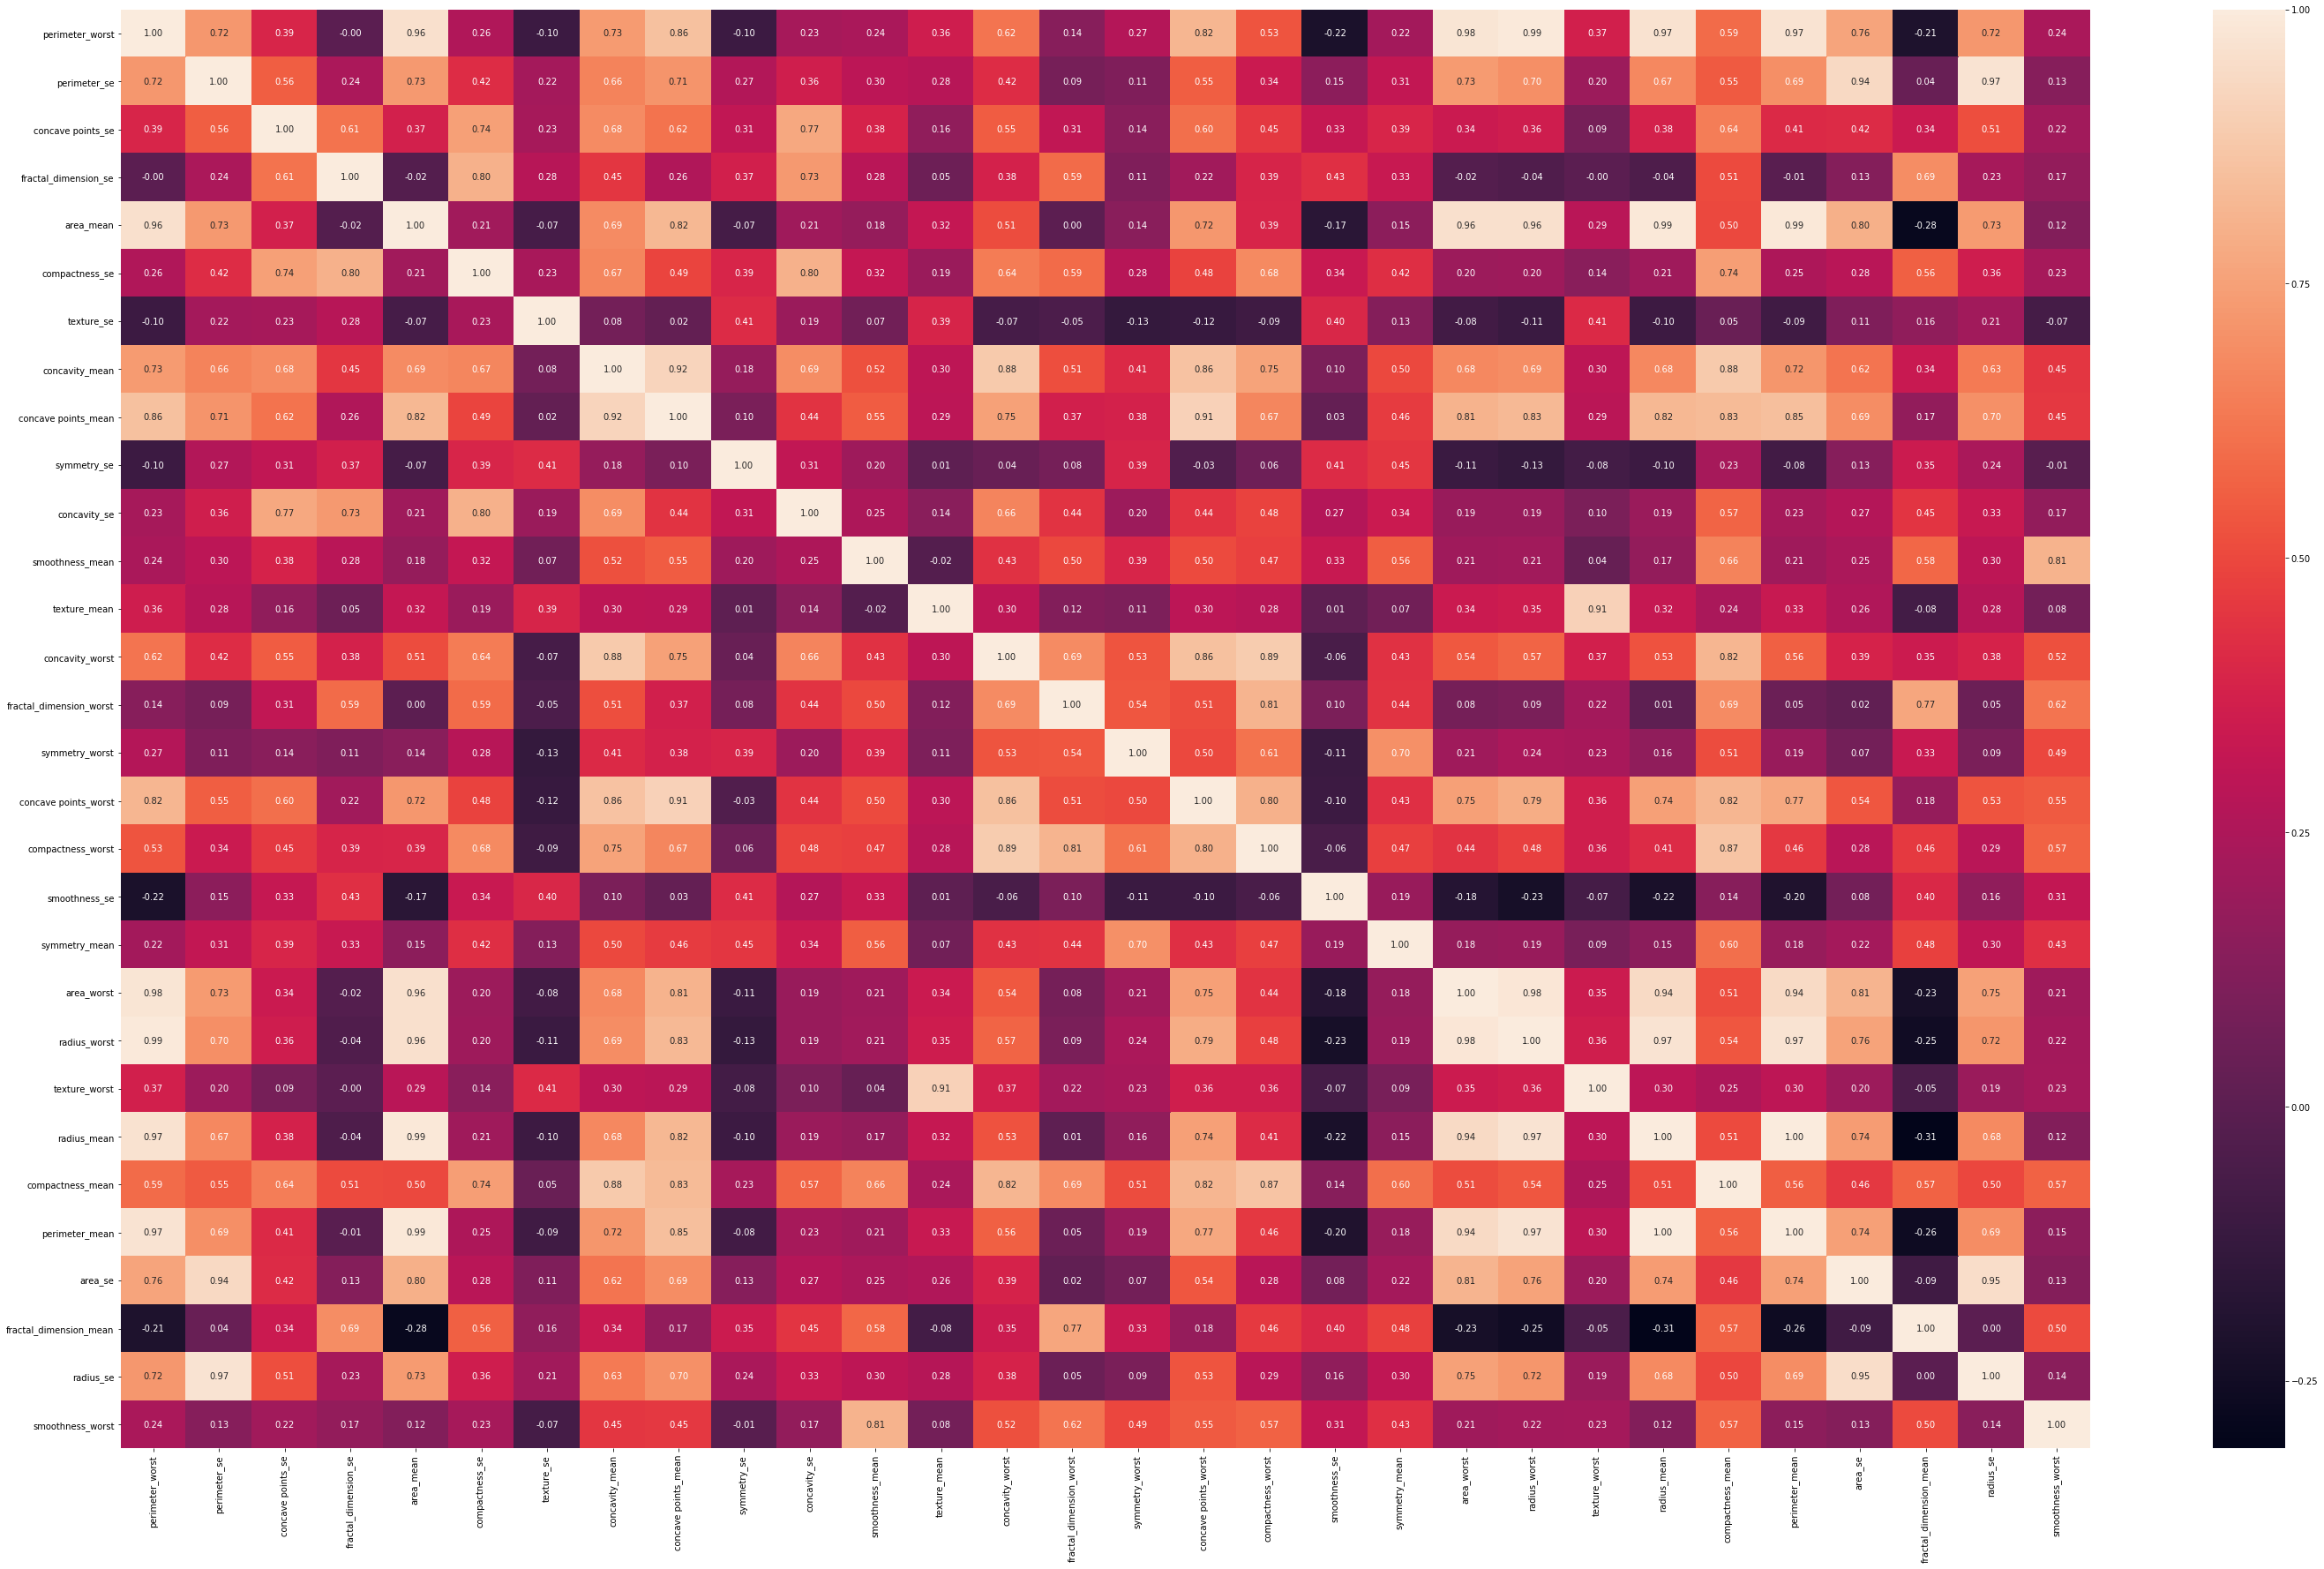

In [11]:
# Рисуем тепловую карту для корреляций
plt.figure(figsize=(50,30))
sns.heatmap(Corr, annot=True, fmt='.2f')
plt.show()

## Попарные scatterplot'ы для сильно скоррелированных признаков

In [12]:
#Сильно скоррелированные признаки больше 0,9
CorField = list(combinations(Corr.columns, 2))
[(i[0], i[1], Corr.loc[i]) for i in CorField if Corr.loc[i] > 0.9]

[('perimeter_worst', 'area_mean', 0.959119574355266),
 ('perimeter_worst', 'area_worst', 0.9775780914063881),
 ('perimeter_worst', 'radius_worst', 0.993707916102951),
 ('perimeter_worst', 'radius_mean', 0.9651365139559878),
 ('perimeter_worst', 'perimeter_mean', 0.9703868870426388),
 ('perimeter_se', 'area_se', 0.9376554069544158),
 ('perimeter_se', 'radius_se', 0.9727936770160752),
 ('area_mean', 'area_worst', 0.9592133256499006),
 ('area_mean', 'radius_worst', 0.9627460860470841),
 ('area_mean', 'radius_mean', 0.9873571700566119),
 ('area_mean', 'perimeter_mean', 0.9865068039913906),
 ('concavity_mean', 'concave points_mean', 0.9213910263788594),
 ('concave points_mean', 'concave points_worst', 0.9101553142985934),
 ('texture_mean', 'texture_worst', 0.9120445888404215),
 ('area_worst', 'radius_worst', 0.9840145644590724),
 ('area_worst', 'radius_mean', 0.9410824595860459),
 ('area_worst', 'perimeter_mean', 0.9415498080023057),
 ('radius_worst', 'radius_mean', 0.9695389726112053),
 ('

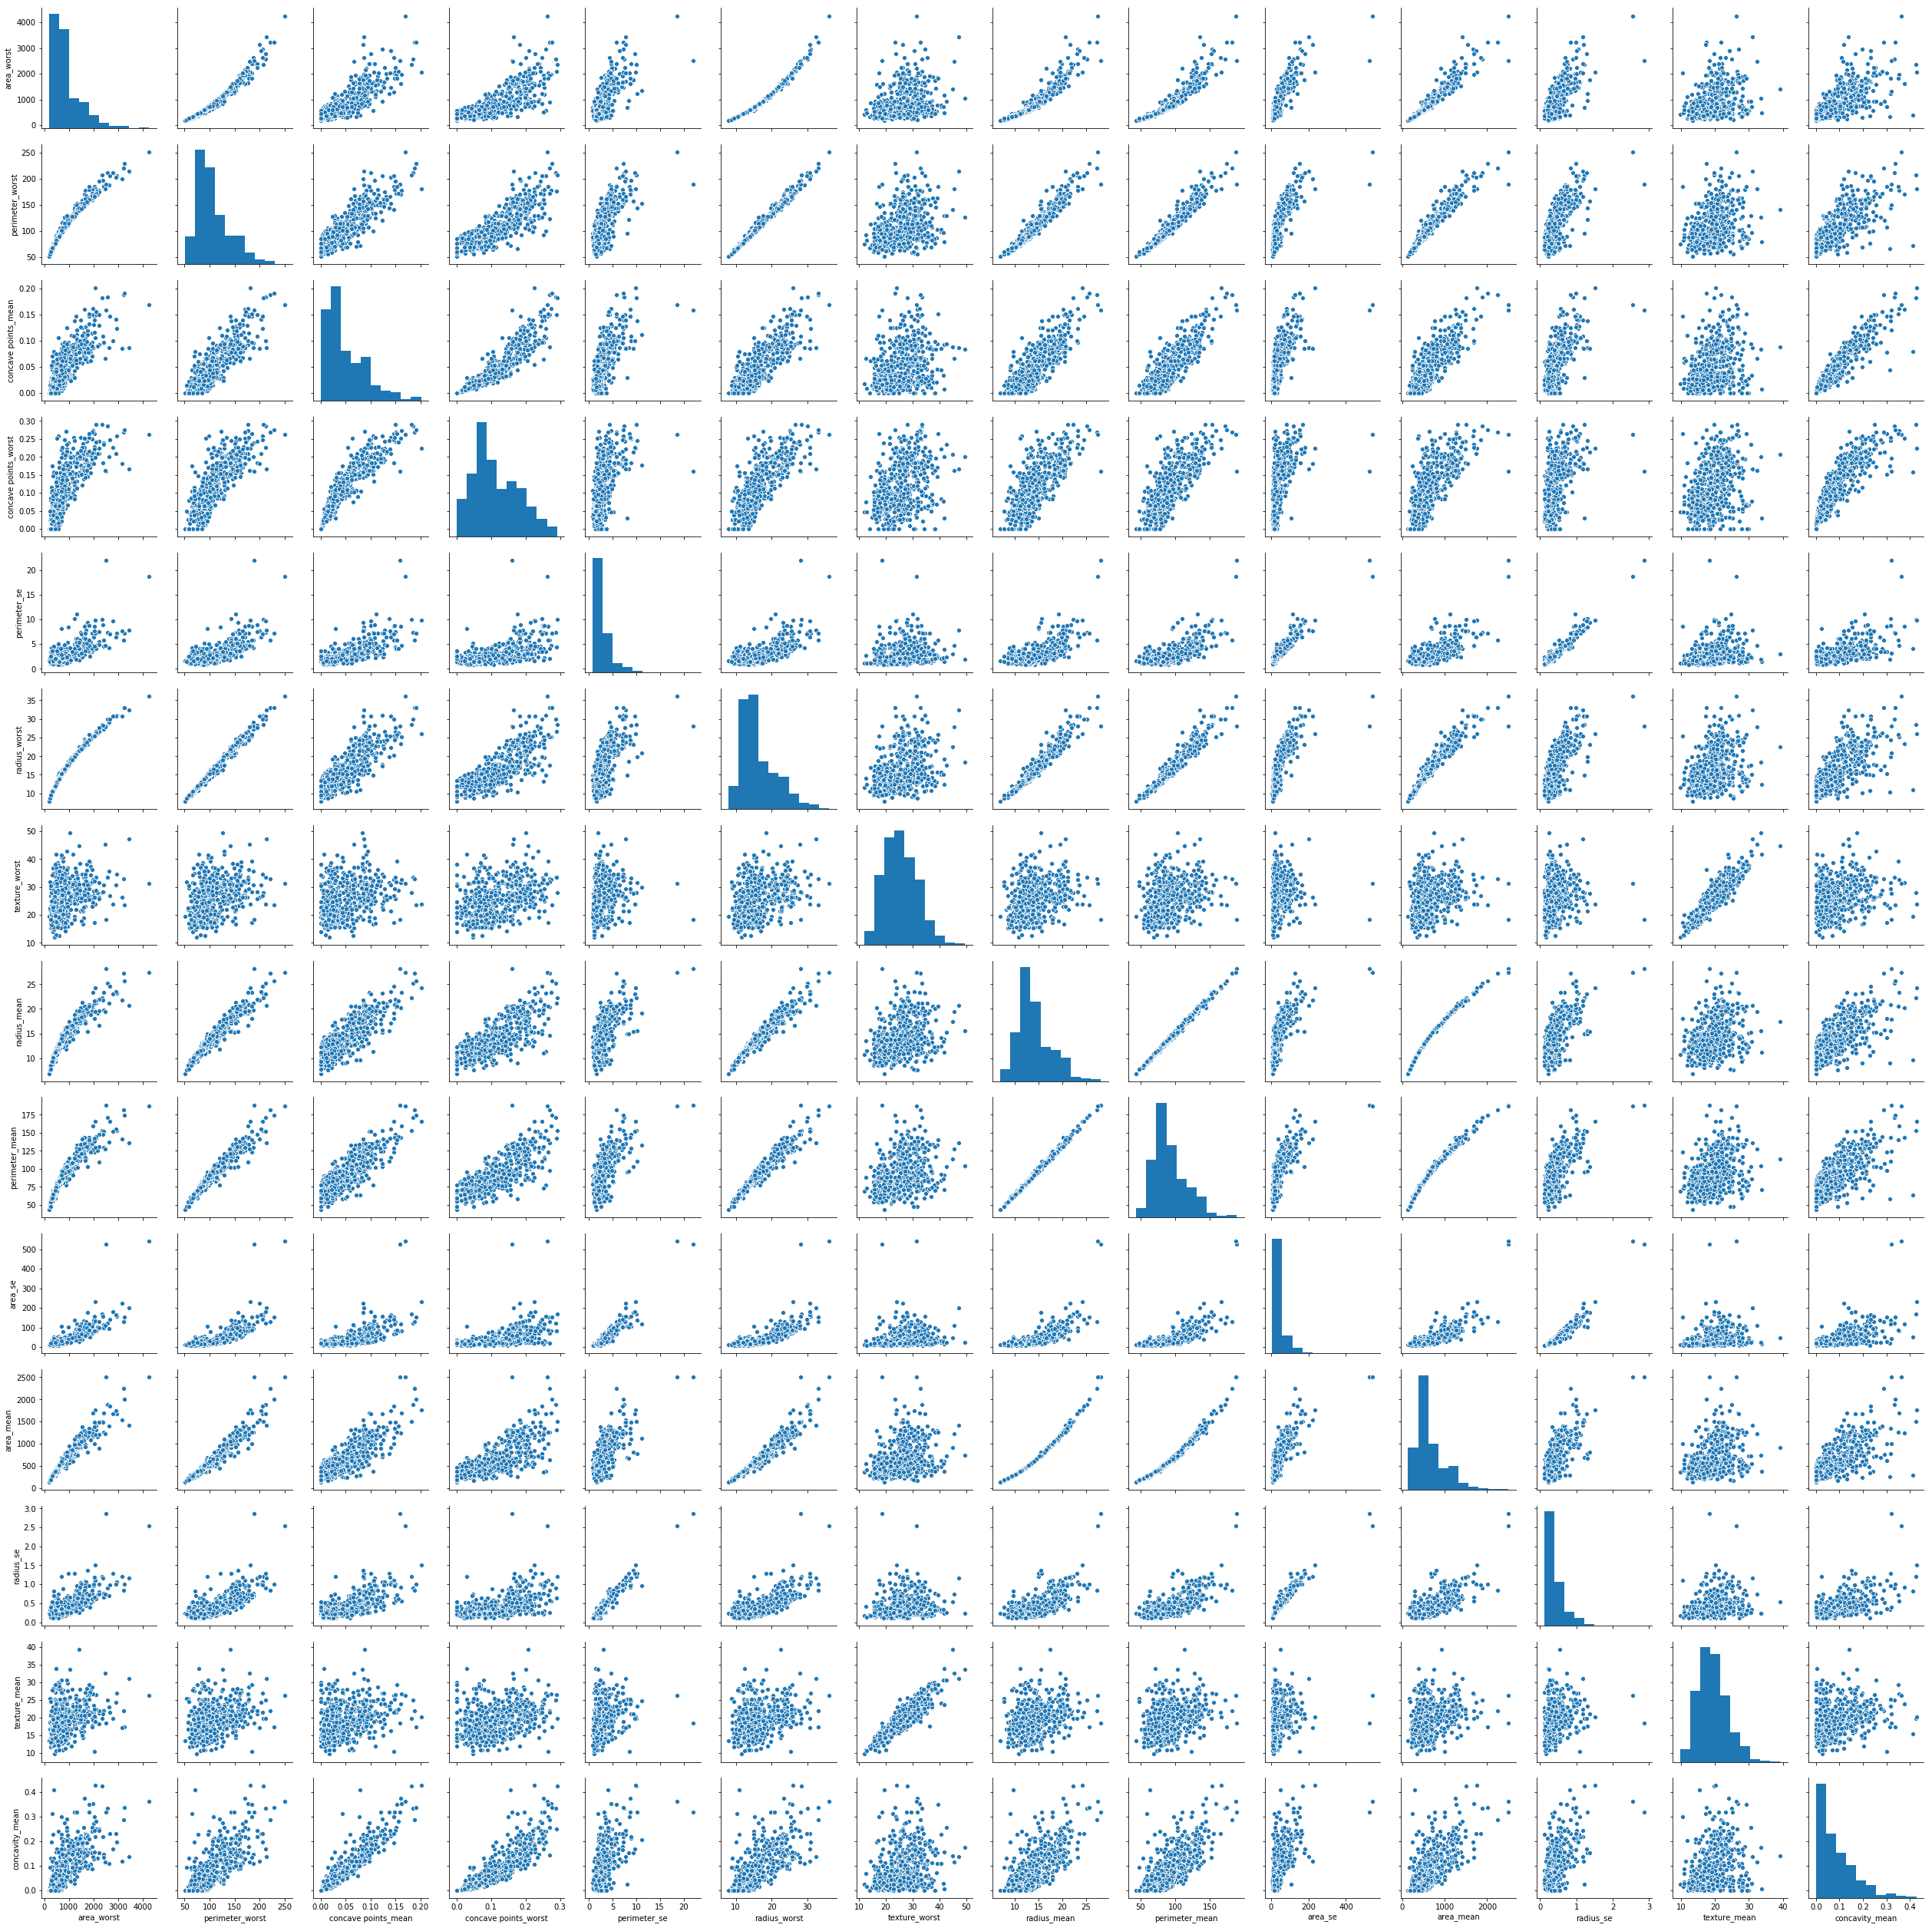

In [13]:
# Строим графики парных корреляций
pair = [(i[0], i[1]) for i in CorField if Corr.loc[i] > 0.9]
p = set(chain(*pair))
sns.pairplot(df[p])
plt.show()

C:\Users\rusak\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


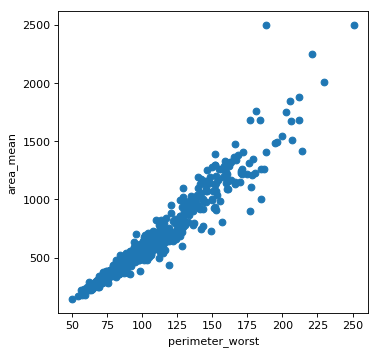

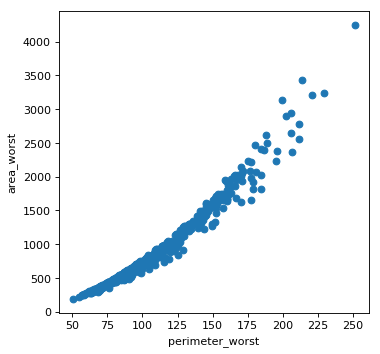

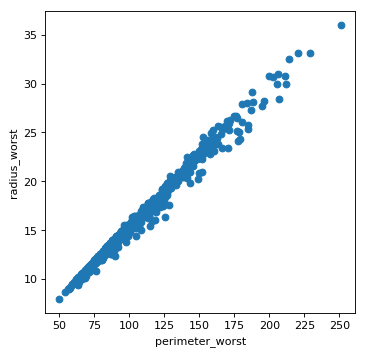

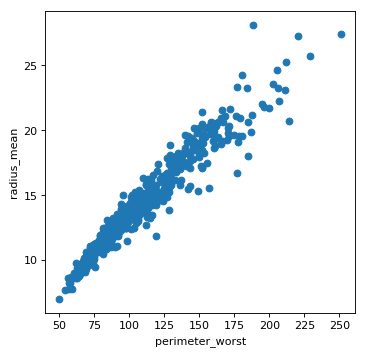

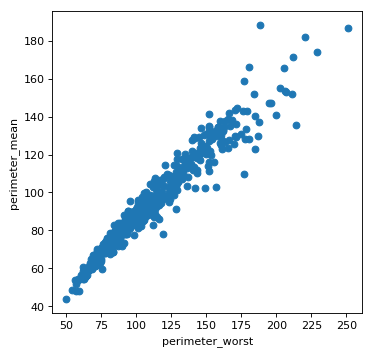

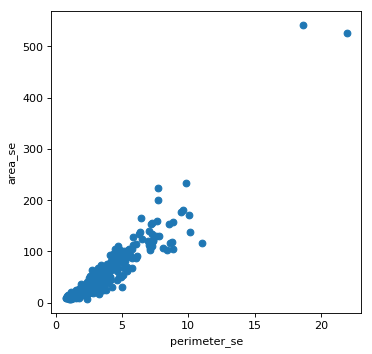

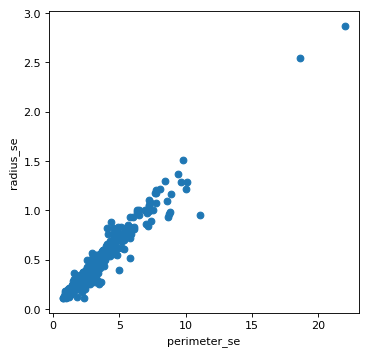

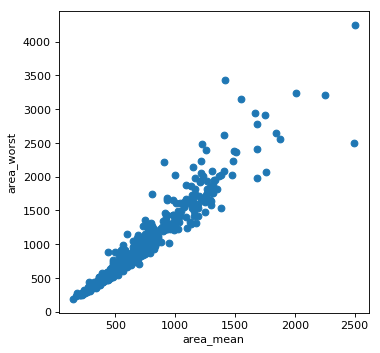

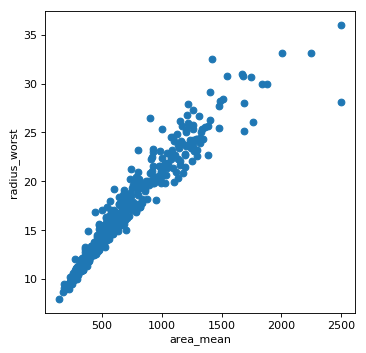

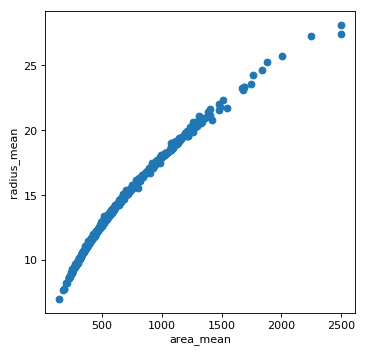

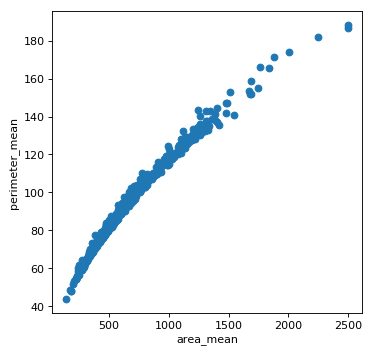

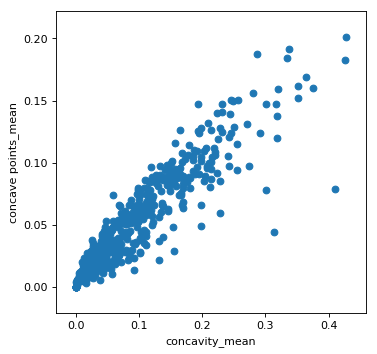

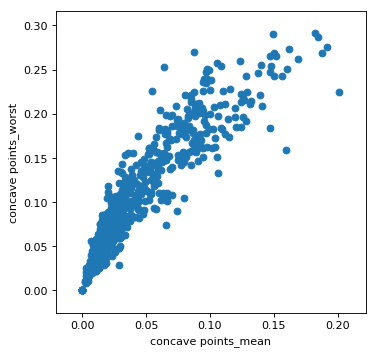

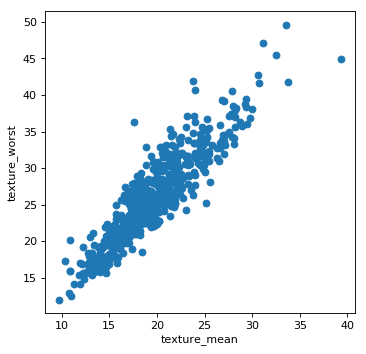

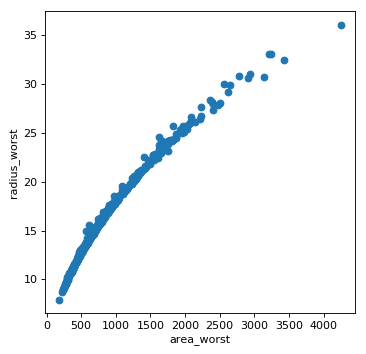

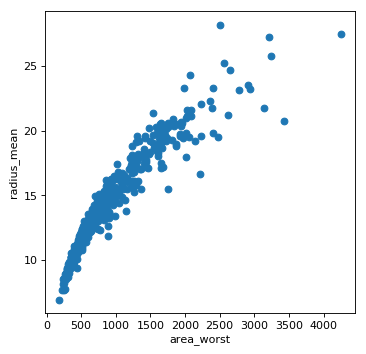

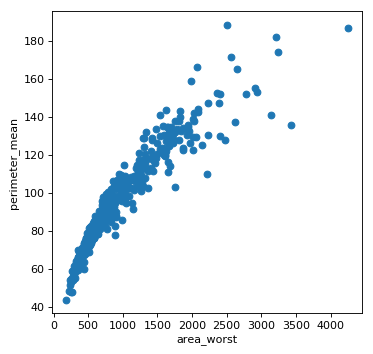

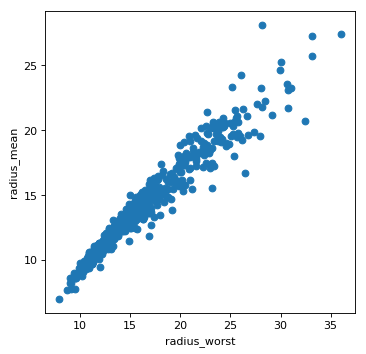

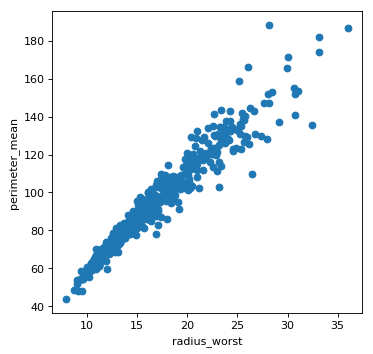

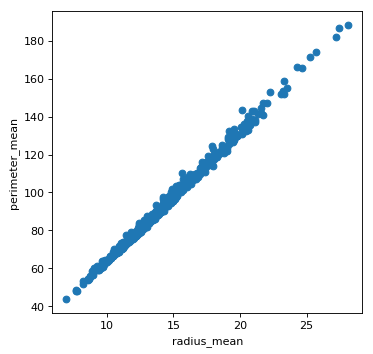

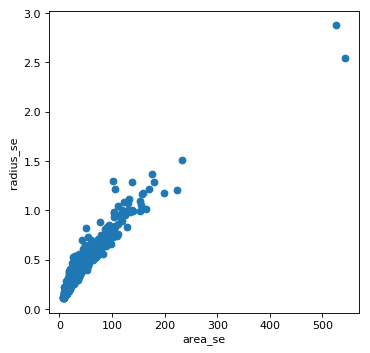

In [14]:
for i in pair:
    plt.figure(figsize=(5,5), dpi= 80)
    plt.scatter(i[0], i[1], data = df)
    plt.xlabel(i[0])
    plt.ylabel(i[1])

#### По scatterplot'ам наблюдается линейная зависимость где-то в меньшей степени (area_se - perimeter_se), а где-то очень явно (perimeter_mean - radius_mean)

## Boxplot с группировкой по целевой переменной

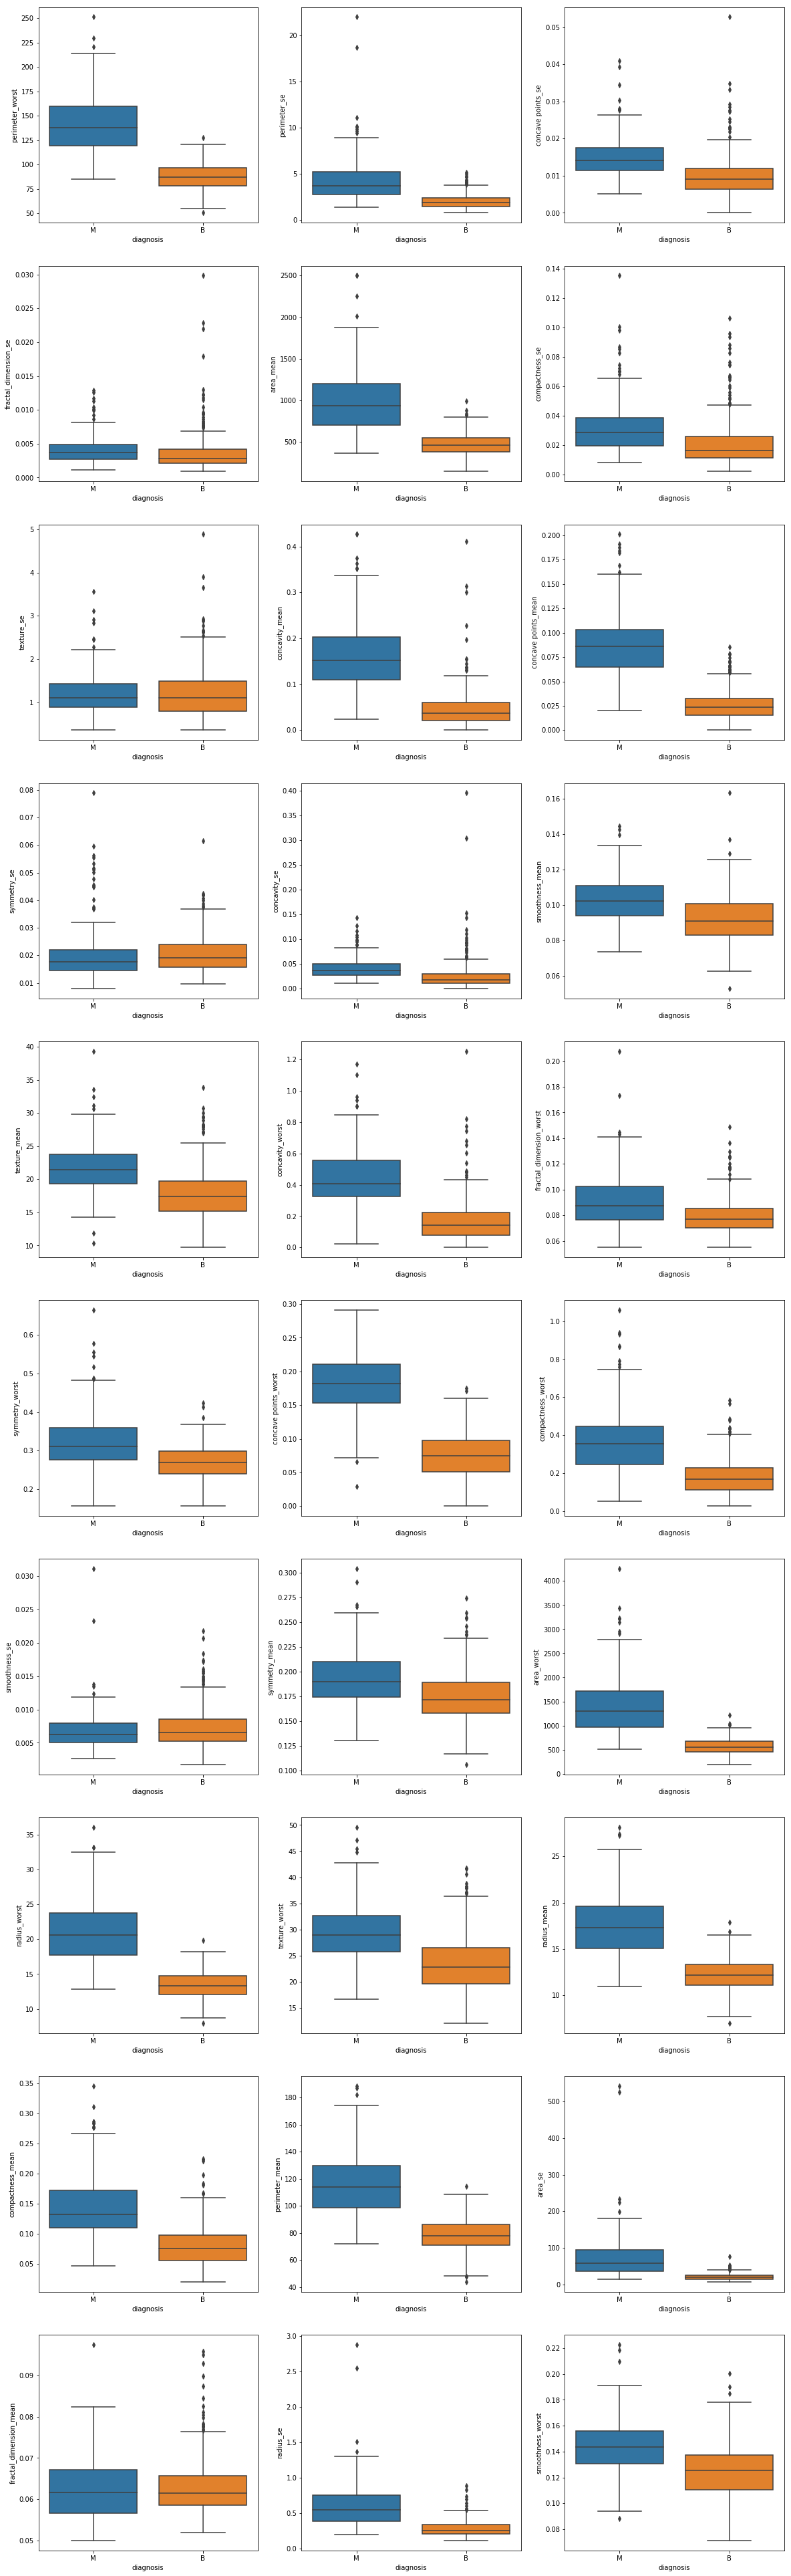

In [15]:
fig, axs = plt.subplots(10, 3, figsize=(20, 70))

j = 0
for i in v:
    ax = axs[j//3,j%3]
    ax= sns.boxplot(x='diagnosis', y=i, ax=ax, data=df)
    j += 1

#### Признаки, по которым будет наиболее удобно определить диагноз:
'radius_worst', 
'perimeter_worst', 
'compactness_mean', 
'radius_se', 
'area_worst', 
'concave points_worst', 
'area_se', 
'compactness_worst', 
'concavity_worst', 
'area_mean', 
'concavity_mean', 
'perimeter_se', 
'radius_mean', 
'perimeter_mean', 
'concave points_mean' 